<a href="https://colab.research.google.com/github/ibonetc/VisionAPI_TensorFlow_Python/blob/master/DA_CloudVisionAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de imágenes con la API de Google: Cloud Vision

**Cloud Vision Api** puede obtenerse desde google.cloud como vision:

*google.cloud.vision*

Necesitaremos también **os** para poder cambiar las variables del sistema y poder asignar las credenciales de google cloud.

Estas credenciales deben descargarse desde la plataforma Google Cloud (recuerde debe tener una cuenta en Google Cloud):

1.   Ir a la Consola de la plataforma Google Cloud
2.   Seleccionamos algún proyecto que tengamos creado o creamos un nuevo proyecto
2.   En el filtro de búsqueda buscamos la Api de Cloud Vision y nos aseguramos que la API esté activa 

2.   Vamos a ver las credenciales asociadas:

> *   Garantizamos que exista un usuario: OAuth 2.0 
*   Creamos una cuenta de servicio o usamos alguna que exista para
*   Entramos en esta cuenta y creamos una clave de tipo JSON (al crearla se nos descarga un fichero JSON que ubicamos en alguna ruta en en Drive)


Para poder utilizar de manera más fácil los documentos, ficheros e imágenes en estas clases, cree una carpeta en su Drive y accederemos a ella cada vez que necesitemos información.

Colab no trae por defecto la api de google cloud, por eso vamos a instalar la biblioteca.

In [ ]:
#Instalando biblioteca de la api de Vision
!pip install google.cloud.vision

In [24]:
#Cargando bibliotecas
from google.cloud import vision
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageDraw

In [23]:
#Cargar el json que descargamos de la cuenta de servicio
os.environ['GOOGLE_APPLICATION_CREDENTIALS']='/content/drive/My Drive/Analitics_Esp/googleapipython.json'

In [46]:
cisnes='/content/drive/My Drive/Ejemplos R_Otros/Fotos/cisnes.jpg'
face='/content/drive/My Drive/Ejemplos R_Otros/Fotos/face.jpg'
fiesta='/content/drive/My Drive/Ejemplos R_Otros/Fotos/fiesta.jpg'
london='/content/drive/My Drive/Ejemplos R_Otros/Fotos/london.jpg'
nottinghan='/content/drive/My Drive/Ejemplos R_Otros/Fotos/Nottingham.jpg'
cisneNegro='/content/drive/My Drive/Ejemplos R_Otros/Fotos/cisneNegro.jpg'
warwich='/content/drive/My Drive/Ejemplos R_Otros/Fotos/warwick.jpg'
image_text='/content/drive/My Drive/Ejemplos R_Otros/Fotos/text.jpg'
grupoI='/content/drive/My Drive/Ejemplos R_Otros/Fotos/grupoI.jpg'
castilloMedellin='/content/drive/My Drive/Ejemplos R_Otros/Fotos/CastilloMedellin.jpg'
cuba='/content/drive/My Drive/Ejemplos R_Otros/Fotos/Cuba.jpg'

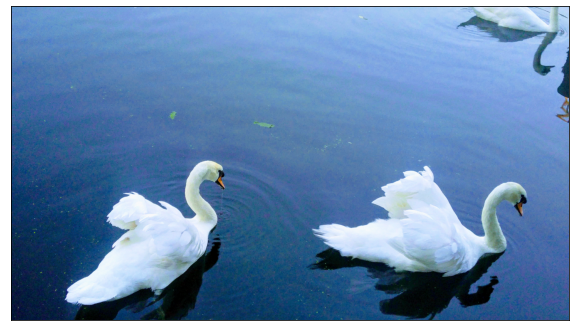

In [6]:
file_image=cisnes
imcv2=cv2.imread(file_image)
imcv2=cv2.cvtColor(imcv2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(imcv2)
plt.show()

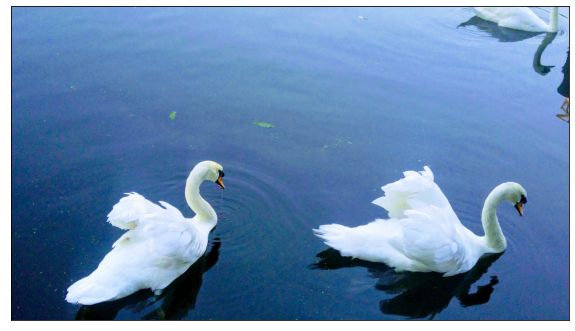

In [ ]:
plt.figure(figsize=(10,10))
img = plt.imread(cisnes)
plt.xticks([])
plt.yticks([])
plt.imshow(img)

##Reconocimiento de rostro en una imagen

Carguemos una imagen con un solo rostro primero

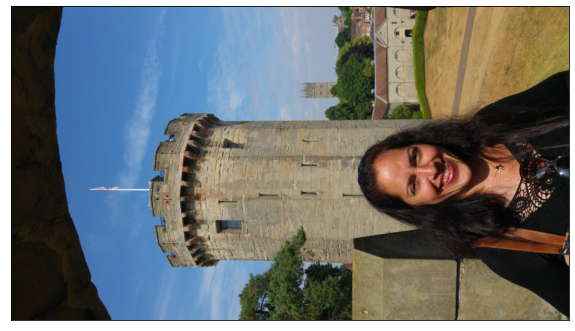

In [26]:
file_image=face
img = plt.imread(file_image)

plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(img)

Si es necesario rotar la imagen se puede hacer utilizando la función rotate de la biblioteca cv2

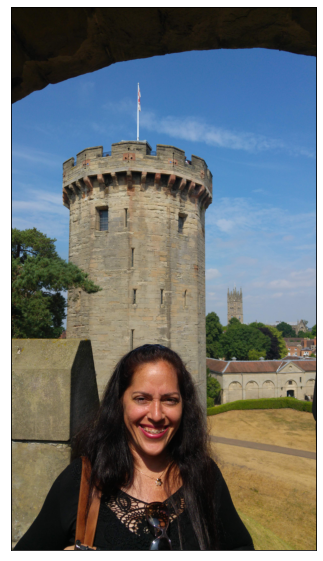

In [27]:
img_rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(img_rotate)

Para cargar los datos de la imagen y ser procesados por la API, para una imagen en ruta local, podemos utilizar la función open y read de ficheros para devolver un stream.

Se abrirá para modo lectura (***r***) y binario(***b***)

In [28]:
#Se abrirá para modo lectura (r) y binario(b)
with open(file_image, 'rb') as openfile:
  content = openfile.read()

Como esto lo vamos a utilizar para abrir todas las fotos, vamos a crear una función con este código

In [29]:
def openImage(file_image):
  with open(file_image, 'rb') as openfile:
    content = openfile.read()
  return content

***ImageAnnotatorClient*** es la clase a la que debemos acceder para poder sacar los diferentes rasgos de la imagen: detección de rostro, logos, sitios de interés, objetos...*texto*

In [30]:
client = vision.ImageAnnotatorClient()
image = vision.Image() #Variable para almacenar la imagen que será pasada al método de detección
image.content = openImage(grupoI) #content
response = client.face_detection(image)

In [13]:
len(response.face_annotations)

10

In [31]:
client = vision.ImageAnnotatorClient()
image = vision.Image() #Variable para almacenar la imagen que será pasada al método de detección
image.content = openImage(face) #content
response = client.face_detection(image)

In [32]:
len(response.face_annotations) #Cantidad de rostros detectados

1

Opción con la biblioteca cv2

In [33]:
img = plt.imread(face)
faces=response.face_annotations
face1=faces[0]
box = [(vertex.x, vertex.y) for vertex in face1.bounding_poly.vertices]
i=cv2.rectangle(img,box[0],box[2],(255,0,0),12)

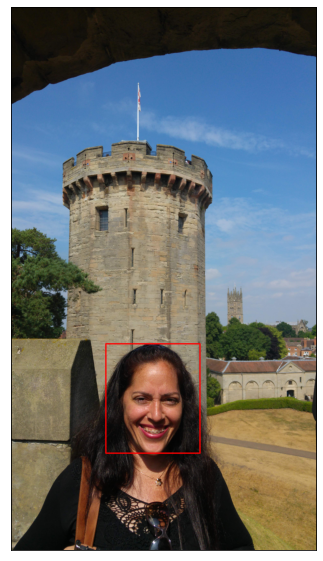

In [34]:
plt.figure(figsize=(10,10))
img_rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.xticks([])
plt.yticks([])
plt.imshow(img_rotate)

Otras características del rostro

In [36]:
surprise=vision.Likelihood(face1.surprise_likelihood).name
joy=vision.Likelihood(face1.joy_likelihood).name
anger=vision.Likelihood(face1.anger_likelihood).name
print('surprise: ' +surprise)
print('joy: ' +joy)
print('anger: ' +anger)

surprise: VERY_UNLIKELY
joy: VERY_LIKELY
anger: VERY_UNLIKELY


Opción con la biblioteca Image e ImageDraw

In [47]:
faces=response.face_annotations
im = Image.open(face)
draw = ImageDraw.Draw(im)
for f in faces:
    box = [(vertex.x, vertex.y) for vertex in f.bounding_poly.vertices]
    draw.line(box + [box[0]], width=20, fill='red')
#im.save("ejemploFace.jpg")#Si quisiera guardar la imagen

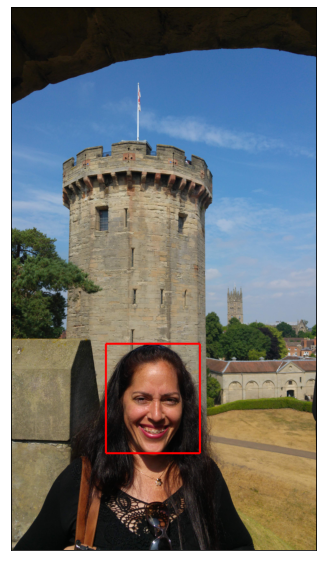

In [38]:
plt.figure(figsize=(10,10))
angle = 270
out = im.rotate(angle, expand=True)
plt.xticks([])
plt.yticks([])
plt.imshow(out)

###Puntos detectados en el rostro

***fd_bounding_poly*** son las coordenadas de la parte del rostro que se usa para comparar y donde están los puntos claves.

In [39]:
box_fd = [(vertex.x, vertex.y) for vertex in face1.fd_bounding_poly.vertices]
i=cv2.rectangle(i,box_fd[0],box_fd[2],(0,255,0),12)

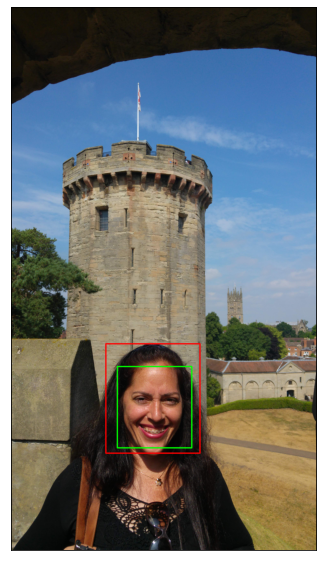

In [40]:
plt.figure(figsize=(10,10))
img_rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.xticks([])
plt.yticks([])
plt.imshow(img_rotate)

In [41]:
faces=response.face_annotations
face1=faces[0]
points=[(int(l.position.x), int(l.position.y)) for l in face1.landmarks]
for p in points:
  i=cv2.circle(i, p, 3, (0,255,0),20)

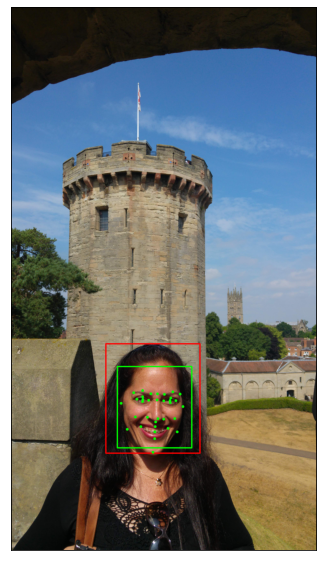

In [42]:
plt.figure(figsize=(10,10))
img_rotate = cv2.rotate(i, cv2.ROTATE_90_CLOCKWISE)
plt.xticks([])
plt.yticks([])
plt.imshow(img_rotate)

Para identificar varias caras habría que hacer un ciclo. Se puede utilizar el código anterior dentro de una función.

In [49]:
def activar_API(file_image):
  client = vision.ImageAnnotatorClient()
  image = vision.Image() #Variable para almacenar la imagen que será pasada al método de detección
  image.content = openImage(file_image) #content
  return client, image

def reconocer_rostro(file_image):
  client, image= activar_API(file_image)
  response = client.face_detection(image=image)
  return response

def mostrar_reconocer_rostro(file_image):
  response=reconocer_rostro(file_image)
  img = plt.imread(file_image)
  faces=response.face_annotations
  for f in faces:
    box = [(vertex.x, vertex.y) for vertex in f.bounding_poly.vertices]
    cv2.rectangle(img,box[0],box[2],(255,0,0),12)
  return img

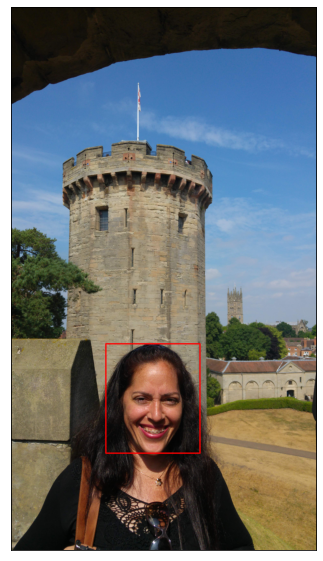

In [50]:
im=mostrar_reconocer_rostro(face)
plt.figure(figsize=(10,10))
img_rotate = cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)
plt.xticks([])
plt.yticks([])
plt.imshow(img_rotate)

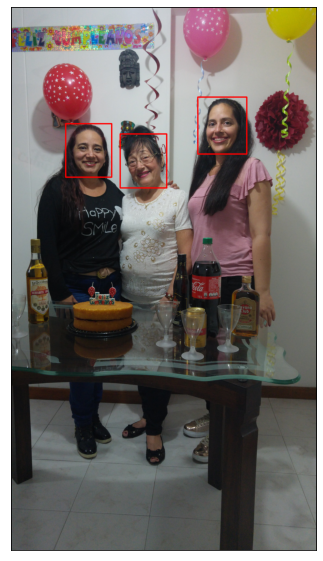

In [51]:
im=mostrar_reconocer_rostro(fiesta)
plt.figure(figsize=(10,10))
img_rotate = cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)
plt.xticks([])
plt.yticks([])
plt.imshow(img_rotate)

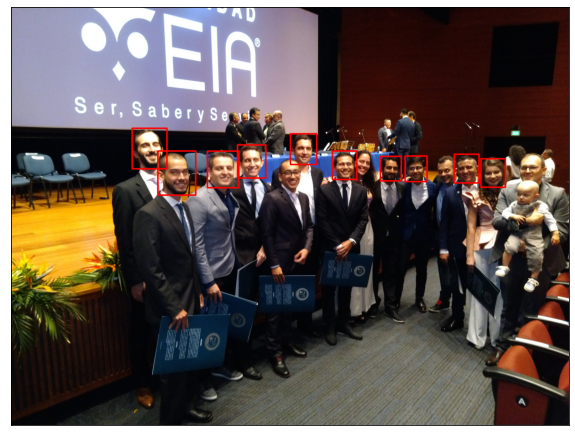

In [52]:
im=mostrar_reconocer_rostro(grupoI)
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(im)

## Reconocimiento de etiqueta en una imagen
Usando la imagen de cisnes vamos a ver qué logra reconocer en la imagen

Podemos utilizar la función de arriba de activar_API

In [53]:
image = vision.Image() #Variable para almacenar la imagen que será pasada al método de detección
image.content = openImage(cisnes) #content
response = client.label_detection(image)

In [54]:
def reconocer_labels(file_image):
  client, image= activar_API(file_image)
  response = client.label_detection(image=image)
  return response

In [55]:
def mostrar_labels(file_image):
  response=reconocer_labels(file_image)
  img = plt.imread(file_image)
  labels=response.label_annotations
  labels_description = [(label.description, round(label.score*100,2)) for label in labels]
  return labels_description

In [56]:
mostrar_labels(cisnes)

[('Bird', 98.83),
 ('Swan', 97.28),
 ('Water bird', 96.35),
 ('Ducks, geese and swans', 93.46),
 ('Beak', 87.9),
 ('Waterfowl', 82.26),
 ('Water', 80.73),
 ('Duck', 79.84),
 ('Sky', 73.26),
 ('Tundra swan', 70.0)]

##Reconocer Lugares de Interés

In [57]:
image = vision.Image()
image.content = openImage(warwich)
response=client.landmark_detection(image)

In [58]:
def reconocer_lankmark(file_image):
  client, image= activar_API(file_image)
  response = client.landmark_detection(image=image)
  return response

def mostrar_lankmark(file_image):
  response=reconocer_lankmark(file_image)
  img = plt.imread(file_image)
  lankmarks=response.landmark_annotations
  for l in lankmarks:
    box = [(vertex.x, vertex.y) for vertex in l.bounding_poly.vertices]
    cv2.rectangle(img,box[0],box[2],(255,0,0),5)
  return img, response

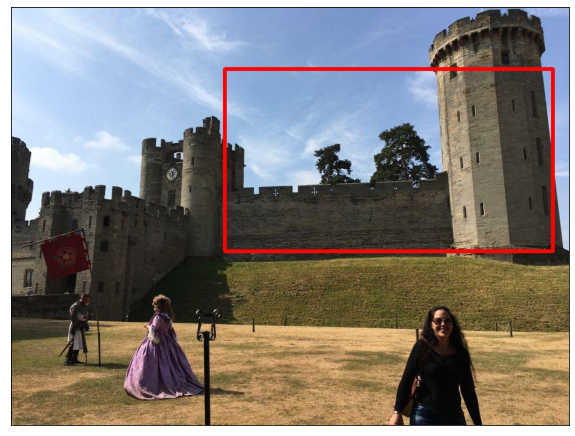

In [59]:
im, response=mostrar_lankmark(warwich)
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(im)

In [60]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

In [61]:
latitude=response.landmark_annotations[0].locations[0].lat_lng.latitude
longitude=response.landmark_annotations[0].locations[0].lat_lng.longitude
place=response.landmark_annotations[0].description
coords_map = [latitude, longitude]
#Crear mapa
my_map = folium.Map(location = coords_map, zoom_start = 15)
coords_lankmark = [latitude, longitude]
#Adicionar marcas al mapa
folium.Marker(coords_lankmark, popup = place).add_to(my_map)
#Mostrar el mapa
my_map

In [62]:
def mostrar_map_lankmark(response):
  latitude=response.landmark_annotations[0].locations[0].lat_lng.latitude
  longitude=response.landmark_annotations[0].locations[0].lat_lng.longitude
  place=response.landmark_annotations[0].description
  coords_map = [latitude, longitude]
  #Crear mapa
  my_map = folium.Map(location = coords_map, zoom_start = 15)
  coords_lankmark = [latitude, longitude]
  #Adicionar marcas al mapa
  folium.Marker(coords_lankmark, popup = place).add_to(my_map)
  #Mostrar el mapa
  my_map

def mostrar_lankmark_map(file_image):
  response=reconocer_lankmark(file_image)
  img = plt.imread(file_image)
  lankmarks=response.landmark_annotations
  latitude=lankmarks[0].locations[0].lat_lng.latitude
  longitude=lankmarks[0].locations[0].lat_lng.longitude
  my_map = folium.Map(location = [latitude, longitude], zoom_start = 15)
  for l in lankmarks:
    box = [(vertex.x, vertex.y) for vertex in l.bounding_poly.vertices]
    cv2.rectangle(img,box[0],box[2],(255,0,0),5)
    place=l.description
    for c in l.locations:
      folium.Marker([c.lat_lng.latitude,c.lat_lng.longitude], popup = place).add_to(my_map)
  return img, my_map, lankmarks

In [63]:
im, my_map, l=mostrar_lankmark_map(warwich)
my_map

Por ejemplo una foto tomada en el Castillo de Medellín:

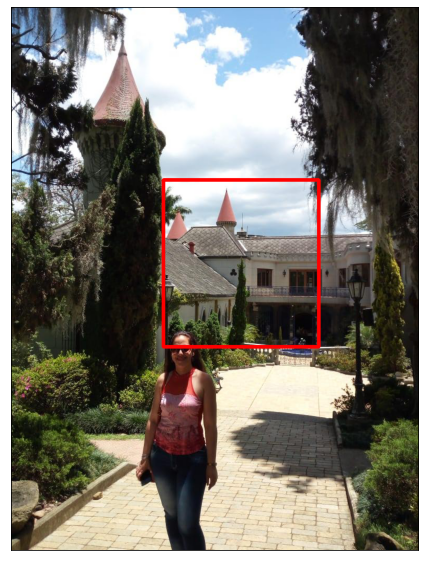

In [64]:
i,m, l=mostrar_lankmark_map('/content/drive/My Drive/Ejemplos R_Otros/Fotos/CastilloMedellin.jpg')
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(i)
m

## Detección de Texto

In [69]:
image = vision.Image()
image.content = openImage(image_text)
response = client.text_detection(image=image)

In [70]:
def reconocer_texto(file_image):
  client, image= activar_API(file_image)
  response = client.text_detection(image=image)
  return response

In [71]:
def mostrar_text(file_image):
  response=reconocer_texto(file_image)
  img = plt.imread(file_image)
  textos=response.text_annotations
  texts = [text.description for text in textos]
  for i,t in enumerate(textos):
    box = [(vertex.x, vertex.y) for vertex in t.bounding_poly.vertices]
    cv2.rectangle(img,box[0],box[2],(255,0,0),4)
    cv2.putText(img, str(i), box[0], cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)
  return img, texts

In [72]:
im, texts=mostrar_text(image_text)

In [73]:
texts

['morfosis\nNIVERSIDAD\nEIA\nBig Data\nIsis Bonet Cruz, PhD.\nUniversidad ElA\nPLAZA\nMAYOR\nMEDELLİN\nCOMVENCIONES Y EXPOSICIONES\nAlcaldía de Medellín\nCuenta con vos\n00000\nCaeA\nLim diee\n.sDm.cm in-\nPLAZ\nMAYO\nMEDEL\n',
 'morfosis',
 'NIVERSIDAD',
 'EIA',
 'Big',
 'Data',
 'Isis',
 'Bonet',
 'Cruz,',
 'PhD.',
 'Universidad',
 'ElA',
 'PLAZA',
 'MAYOR',
 'MEDELLİN',
 'COMVENCIONES',
 'Y',
 'EXPOSICIONES',
 'Alcaldía',
 'de',
 'Medellín',
 'Cuenta',
 'con',
 'vos',
 '00000',
 'CaeA',
 'Lim',
 'diee',
 '.sDm.cm',
 'in-',
 'PLAZ',
 'MAYO',
 'MEDEL']

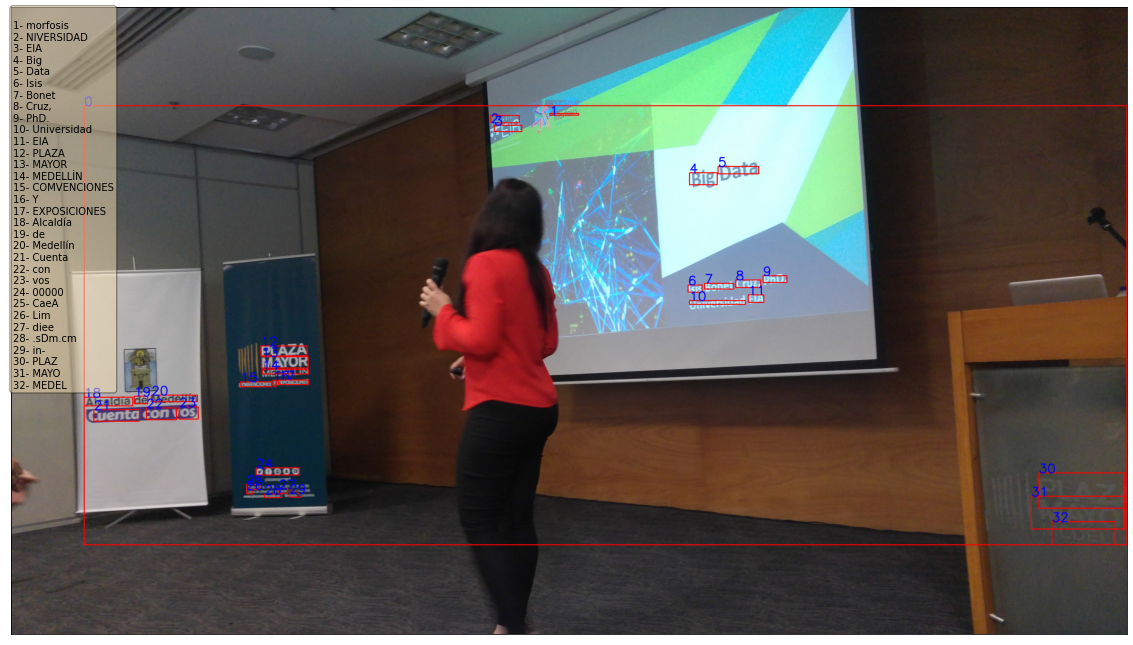

In [74]:
t=''
for i,e in enumerate(texts):
  if i>0:
    t = t+'\n'+str(i)+'- '+ e
plt.figure(figsize=(20,20))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(10, 10, t, fontsize=10,verticalalignment='top', bbox=props)
plt.xticks([])
plt.yticks([])
plt.imshow(im)


## Buscando asociasiones Web

In [75]:
image = vision.Image()
image.content = openImage('/content/drive/My Drive/Ejemplos R_Otros/Fotos/Milan.jpg')
response=client.web_detection(image)

In [76]:
def reconocer_web(file_image):
  client, image= activar_API(file_image)
  return client.web_detection(image)

In [77]:
response=reconocer_web('/content/drive/My Drive/Ejemplos R_Otros/Fotos/Milan.jpg')

Qué se muestra en la imagen?

In [78]:
content=response.web_detection
content.best_guess_labels

[label: "milan central station"
]

In [79]:
predictions = [
(entity.description, '{:.2%}'.format(entity.score)) for entity in content.web_entities
]
predictions

[('Classical architecture', '80.99%'),
 ('Tourist attraction', '64.91%'),
 ('Tourism', '57.87%'),
 ('Façade', '55.56%'),
 ('Milano Centrale Railway Station', '52.95%'),
 ('Ancient Rome', '46.46%'),
 ('Meter', '38.41%'),
 ('Metropolitan area', '37.22%'),
 ('Architecture', '35.42%'),
 ('Daytime', '28.50%')]

¿También puede averiguar de dónde proviene la imagen y si tiene alguna copia?

In [80]:
content.full_matching_images

[]

Imágenes similares:

In [81]:
content.visually_similar_images

[url: "https://media.gettyimages.com/videos/general-view-of-milano-centrale-railway-station-in-milan-italy-on-11-video-id1212012892?s=640x640"
, url: "https://image.shutterstock.com/image-photo/milan-italy-circa-september-2017-260nw-735275656.jpg"
, url: "https://youimg1.c-ctrip.com/target/0ww13120006pfr3mw7B80.jpg"
, url: "https://milanitaly.ca/images/stazionecentrale.jpg"
, url: "https://ak.picdn.net/shutterstock/videos/15635992/thumb/1.jpg?ip=x480"
, url: "https://rugby7s2017.eusa.eu/documents/rugby7s2017/centrale.jpg"
, url: "https://us.123rf.com/450wm/jelon80/jelon802009/jelon80200900016/156208561-milan-central-railway-station-milano-centrale-may-2017-milan-italy.jpg?ver=6"
, url: "https://a57.foxnews.com/static.foxnews.com/foxnews.com/content/uploads/2019/09/696/392/Milano-Central-Station-iStock.jpg?ve=1&tl=1"
, url: "https://ak.picdn.net/shutterstock/videos/33387607/thumb/1.jpg?ip=x480"
, url: "https://media.gettyimages.com/photos/milano-centrale-railway-station-in-milan-italy-p

## Detección de objetos

In [82]:
client, img= activar_API(cuba)
response=client.object_localization(img)
objects = client.object_localization(img).localized_object_annotations

In [83]:
def mostrar_objetos(file_image):
  client, image= activar_API(file_image)
  objects = client.object_localization(image).localized_object_annotations
  img = plt.imread(file_image)
  w = img.shape[1]
  h = img.shape[0]
  objects_id=[o.name for o in objects]
  for object_ in objects:
    box=[(int(v.x*w), int(v.y*h)) for v in object_.bounding_poly.normalized_vertices]
    cv2.rectangle(img,box[0],box[2],(255,0,0),12)
    cv2.putText(img, object_.name, box[0], cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)
  return img,objects_id

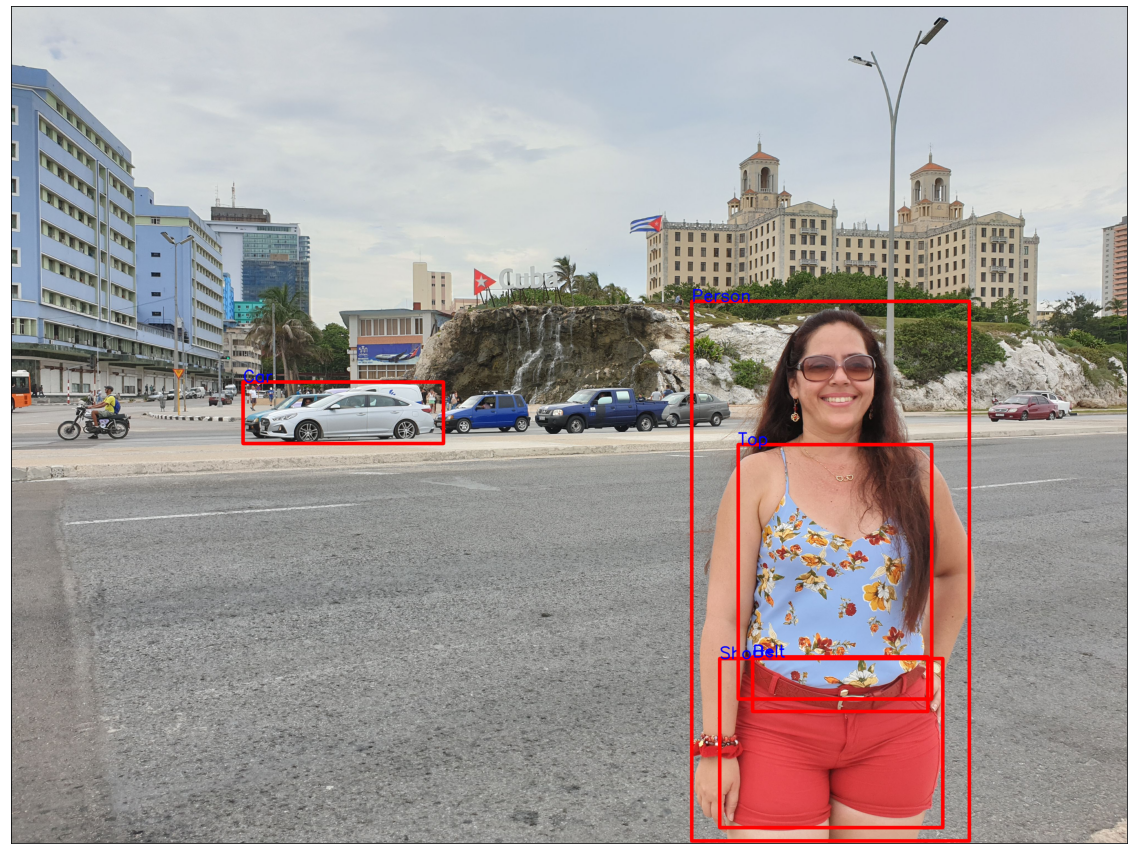

In [84]:
img,objects_id=mostrar_objetos(cuba)
plt.figure(figsize=(20,20))
plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [85]:
objects_id

['Shorts', 'Top', 'Person', 'Car', 'Belt']

## Otros

***safe_search_detection***:

La detección de búsqueda segura identifica contenido explícito, como contenido para adultos o violento, en una imagen. Esta característica usa cinco categorías (adult, spoof, medical, violence y racy) y muestra la probabilidad de que cada una esté presente en una imagen determinada.

Devuelve un número que indica:

['UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',                          'LIKELY', 'VERY_LIKELY']

In [86]:
client, img= activar_API(cuba)
response = client.safe_search_detection(image=image)
safe = response.safe_search_annotation
safe

adult: VERY_UNLIKELY
spoof: VERY_UNLIKELY
medical: VERY_UNLIKELY
violence: VERY_UNLIKELY
racy: VERY_UNLIKELY

Tabmbién se puede traducir el texto que se encuentre en una imagen o las descripciones.

In [87]:
from google.cloud import translate

In [88]:
translate_client = translate.Client()
detect_language_response = translate_client.detect_language(objects_id)

In [89]:
detect_language_response

[{'confidence': 0.7362205386161804, 'input': 'Shorts', 'language': 'en'},
 {'confidence': 0.8661417961120605, 'input': 'Top', 'language': 'en'},
 {'confidence': 0.83984375, 'input': 'Person', 'language': 'en'},
 {'confidence': 0.8515625, 'input': 'Car', 'language': 'en'},
 {'confidence': 0.8779527544975281, 'input': 'Belt', 'language': 'en'}]

In [92]:
translated = translate_client.translate(objects_id,
                                                      target_language='es',
                                                      source_language='en')

In [93]:
translated_text=[]
for t in translated:
  translated_text.append(t['translatedText'])
translated_text

['Pantalones cortos', 'Parte superior', 'Persona', 'Coche', 'Cinturón']